In [1]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8886 non-null   datetime64[ns]
 1   Demanda    8886 non-null   float64       
 2   VolUtil    8886 non-null   float64       
 3   Aportes    8886 non-null   float64       
 4   PrecioB    8886 non-null   float64       
 5   PrecioO    8886 non-null   float64       
 6   DispTer    8886 non-null   float64       
 7   DispNoTer  8886 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 555.5 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2000-01-01')
end_time = pd.to_datetime('2022-12-31')

In [6]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [7]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_23688\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_23688\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_23688\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
0,3.619477e+06,1.080803e+10,56677300.0,32.868123,98.359312,2.846091e+06,7.774834e+06,2000,1,1
1,3.660170e+06,1.078818e+10,54645200.0,33.034790,96.103387,2.754967e+06,7.766716e+06,2000,1,2
2,4.366035e+06,1.075306e+10,57488300.0,37.272290,96.537377,2.751592e+06,7.761926e+06,2000,1,3
3,4.491048e+06,1.071967e+10,58418200.0,41.688957,96.636300,2.751300e+06,7.744445e+06,2000,1,4
4,4.459620e+06,1.068971e+10,63039500.0,40.893123,94.805851,2.751300e+06,7.759892e+06,2000,1,5
...,...,...,...,...,...,...,...,...,...,...
8394,8.521143e+06,1.462431e+10,154789300.0,444.593687,615.591675,4.547375e+06,1.041296e+07,2022,12,26
8395,8.865542e+06,1.458431e+10,175677200.0,467.576040,628.079660,4.453366e+06,1.040160e+07,2022,12,27
8396,9.096495e+06,1.452944e+10,165261000.0,509.280527,611.296773,4.611281e+06,1.044798e+07,2022,12,28
8397,8.975143e+06,1.445778e+10,150082100.0,507.731437,613.201844,4.581000e+06,1.044604e+07,2022,12,29


In [9]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [10]:
print(X)

           Demanda       VolUtil      Aportes     PrecioO       DispTer  \
0     3.619477e+06  1.080803e+10   56677300.0   98.359312  2.846091e+06   
1     3.660170e+06  1.078818e+10   54645200.0   96.103387  2.754967e+06   
2     4.366035e+06  1.075306e+10   57488300.0   96.537377  2.751592e+06   
3     4.491048e+06  1.071967e+10   58418200.0   96.636300  2.751300e+06   
4     4.459620e+06  1.068971e+10   63039500.0   94.805851  2.751300e+06   
...            ...           ...          ...         ...           ...   
8395  8.865542e+06  1.458431e+10  175677200.0  628.079660  4.453366e+06   
8396  9.096495e+06  1.452944e+10  165261000.0  611.296773  4.611281e+06   
8397  8.975143e+06  1.445778e+10  150082100.0  613.201844  4.581000e+06   
8398  8.780105e+06  1.440128e+10  139303200.0  608.332576  4.578537e+06   
8399  8.120581e+06  1.438093e+10  148298100.0  600.180013  4.578250e+06   

         DispNoTer  year  month  day  
0     7.774834e+06  2000      1    1  
1     7.766716e+06  2

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [13]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.6000000000000002, 'n_estimators': 90}


In [15]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -28.516642482167658


In [16]:
grid_search.cv_results_

{'mean_fit_time': array([0.07978239, 0.2200541 , 0.25129542, 0.26078877, 0.47923141,
        0.55683603, 0.64446211, 0.62105799, 0.51131186, 0.69389586,
        0.65014577, 0.942032  , 0.91439581, 0.85623045, 0.83588142,
        1.0016974 , 1.15031352, 1.16149807, 1.27539878, 0.06270709,
        0.12323475, 0.24495134, 0.2463347 , 0.2834476 , 0.36196489,
        0.36927643, 0.49149013, 0.52564907, 0.57175646, 0.65803232,
        0.65302339, 0.7176888 , 0.8342895 , 0.79767423, 0.95344806,
        1.01723576, 1.00727906, 1.06846957, 0.06546388, 0.11939287,
        0.18932047, 0.24190469, 0.29582996, 0.35965462, 0.40098972,
        0.46269007, 0.46972284, 0.6104136 , 0.59992361, 0.66086755,
        0.7722743 , 0.77716208, 0.83699656, 0.95744758, 1.02147231,
        1.021278  , 1.1123354 , 0.0885293 , 0.16352959, 0.24615059,
        0.33372211, 0.40810852, 0.57185526, 0.52584705, 0.631811  ,
        0.76449685, 0.76774721, 0.8131453 , 0.91036782, 0.9562921 ,
        1.03133574, 1.07085152,

In [17]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=90, max_features=0.6000000000000002, random_state=42)

In [18]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6000000000000002, n_estimators=90,
                      random_state=42)

In [19]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [20]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 23.44176433557539


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 12.739926783134917


In [22]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.9677763765749795


In [23]:
# Calcular los residuos
residuos = y_test - predictions

In [24]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [25]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

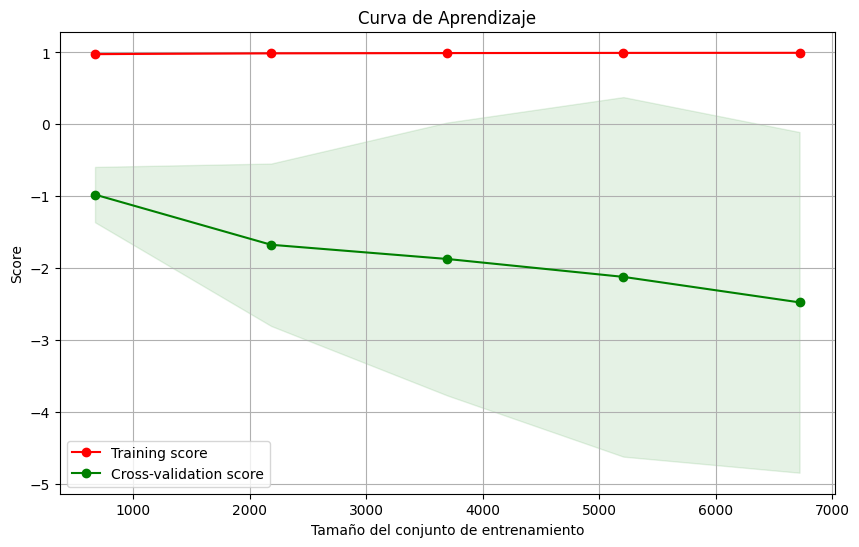

In [26]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

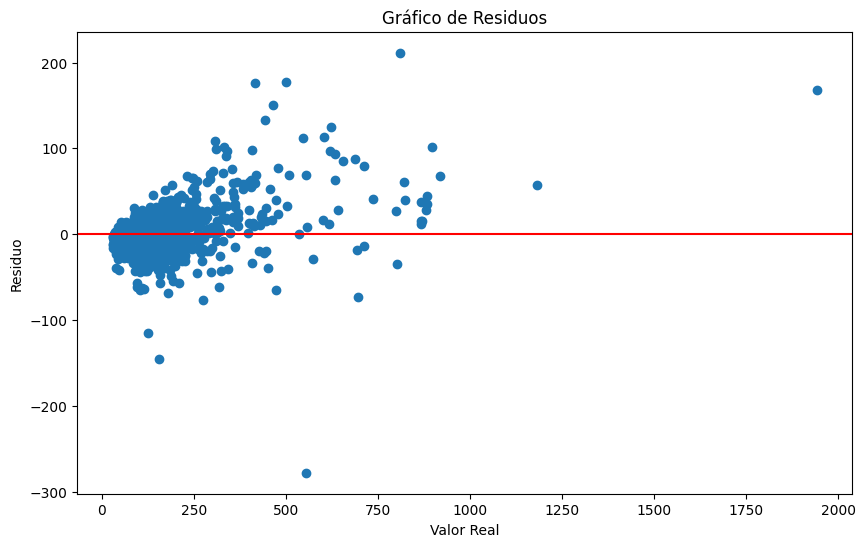

In [27]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

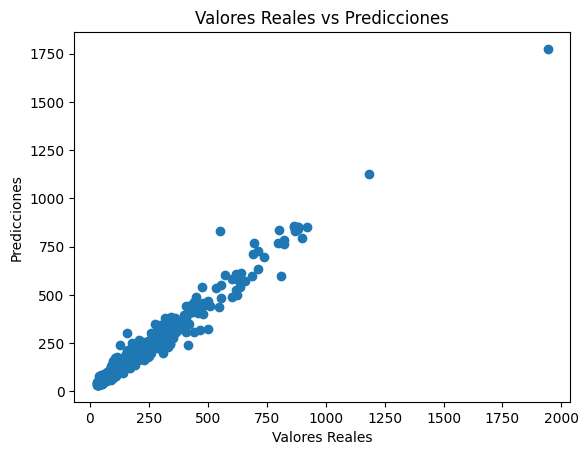

In [28]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

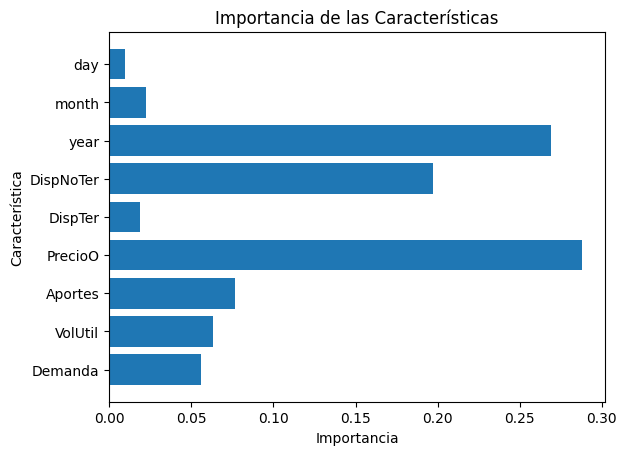

In [29]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [54]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2023-01-01')
end_time_future = pd.to_datetime('2024-05-07')

In [55]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [56]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [57]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 8400 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       486 non-null    datetime64[ns]
 1   Demanda    486 non-null    float64       
 2   VolUtil    486 non-null    float64       
 3   Aportes    486 non-null    float64       
 4   PrecioB    486 non-null    float64       
 5   PrecioO    486 non-null    float64       
 6   DispTer    486 non-null    float64       
 7   DispNoTer  486 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 34.2 KB


In [58]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_23688\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_23688\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_23688\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [59]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [60]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 8400 to 8885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    486 non-null    float64
 1   VolUtil    486 non-null    float64
 2   Aportes    486 non-null    float64
 3   PrecioO    486 non-null    float64
 4   DispTer    486 non-null    float64
 5   DispNoTer  486 non-null    float64
 6   year       486 non-null    int32  
 7   month      486 non-null    int32  
 8   day        486 non-null    int32  
dtypes: float64(6), int32(3)
memory usage: 32.3 KB


In [61]:
predicciones_futuras = best_model.predict(df_future2)

In [62]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [304.97685576 264.05965485 266.44088178 263.93184391 265.16629396
 264.82393691 249.03697219 220.46726644 241.67714593 251.25222737
 240.49972546 233.33115367 247.89023098 235.83784765 250.84319269
 257.06928493 259.31703759 265.93253937 265.02290641 263.87815081
 264.00502513 253.73500878 276.5274415  253.91577096 290.95648413
 342.75987363 333.88169041 360.3441172  385.32042109 420.46298717
 485.95326613 643.19056237 512.085005   513.53290365 492.81099646
 534.66263506 524.64757459 443.76159754 485.36424211 486.736882
 447.40312726 397.97868276 422.53184824 322.65788946 376.50946341
 260.62025809 306.99132217 341.67418402 299.47613889 317.93104033
 351.05242694 360.92109033 336.8757812  399.98142493 456.43778004
 469.4507815  476.75785791 415.34861148 417.89103041 461.36714765
 489.90908287 428.08634993 305.51115415 295.22285493 275.05951448
 286.85850541 275.63936689 265.78893535 260.16948374 271.41274144
 270.41677931 264.7978

In [63]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [64]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
8400  2023      1    1          304.976856
8401  2023      1    2          264.059655
8402  2023      1    3          266.440882
8403  2023      1    4          263.931844
8404  2023      1    5          265.166294
...    ...    ...  ...                 ...
8881  2024      4   26          305.251834
8882  2024      4   27          302.996929
8883  2024      4   28          301.829654
8884  2024      4   29          275.969521
8885  2024      4   30          277.699758

[486 rows x 4 columns]


In [65]:
precio_real = df_DataModel[df_DataModel['Date'] == '2019-03-2']
print(precio_real)

           Date       Demanda       VolUtil      Aportes    PrecioB  \
6999 2019-03-02  7.841278e+06  8.365556e+09  102977300.0  333.57139   

         PrecioO      DispTer     DispNoTer  
6999  378.917146  4284013.875  9.156821e+06  


In [66]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 317.6377237468044


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: -0.36388322375211324


In [68]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

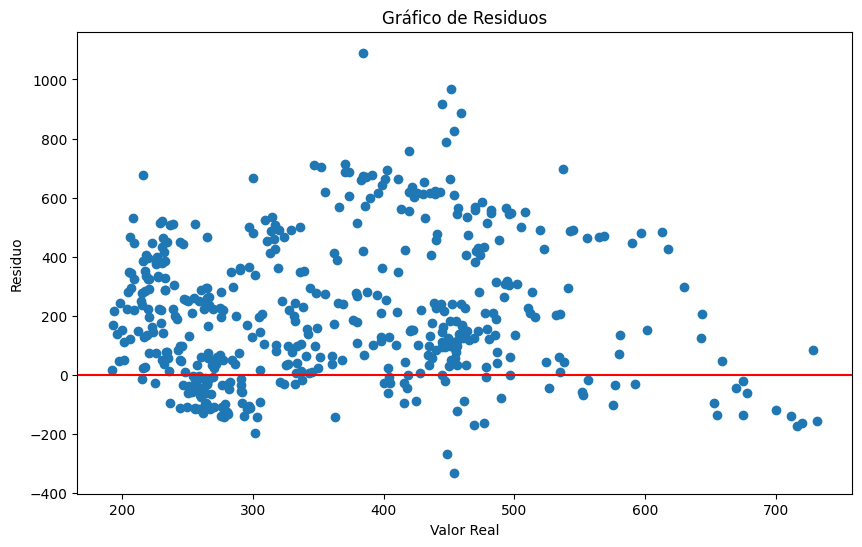

In [69]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(predicciones_futuras, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

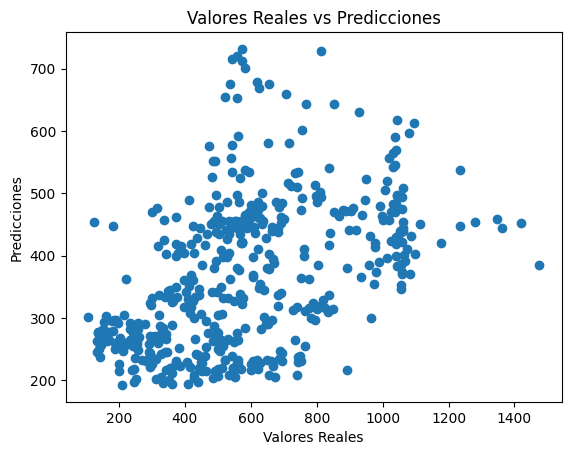

In [70]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(precioB_future, predicciones_futuras)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [71]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 8400 to 8885
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    486 non-null    float64
 1   VolUtil    486 non-null    float64
 2   Aportes    486 non-null    float64
 3   PrecioB    486 non-null    float64
 4   PrecioO    486 non-null    float64
 5   DispTer    486 non-null    float64
 6   DispNoTer  486 non-null    float64
 7   year       486 non-null    int32  
 8   month      486 non-null    int32  
 9   day        486 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 36.1 KB


In [72]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [73]:
df_predicciones.head()

,Prediccion_PrecioB,Date
8400,304.976856,2023-01-01
8401,264.059655,2023-01-02
8402,266.440882,2023-01-03
8403,263.931844,2023-01-04
8404,265.166294,2023-01-05


In [74]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [75]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 8400 to 8885
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  486 non-null    float64       
 1   Date                486 non-null    datetime64[ns]
 2   PrecioB_future      486 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.2 KB


In [76]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
8400,304.976856,2023-01-01,499.859663
8401,264.059655,2023-01-02,510.909360
8402,266.440882,2023-01-03,531.093510
8403,263.931844,2023-01-04,556.687833
8404,265.166294,2023-01-05,560.973353
8405,264.823937,2023-01-06,526.727628
8406,249.036972,2023-01-07,503.256190
8407,220.467266,2023-01-08,415.881105
8408,241.677146,2023-01-09,432.687167
8409,251.252227,2023-01-10,382.044767


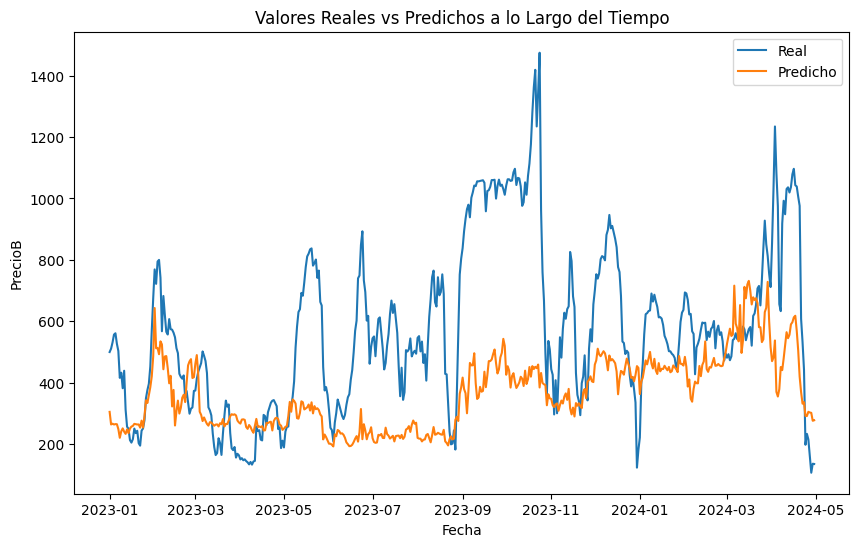

: 

In [77]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()